# EuroCrops Demo

Created by: Maja Schneider  
Updated by: Cyrille Médard de Chardon & Alex Skinner

This notebook assists with exploring the EuroCrops demo datasets.

It mainly covers how to load/open HDF (version 5 -> HDF5) data and how to select individual data bands and time series.

This resource does not describe how to perform Time Series Classification (TSC) through Pixel Set Encoding (PSE) and Temporal Attention Encoding (TAE), only how to access the HDF data that would be inputs for those processes.

For more information on TSC applications for crop types see [Schneider and Körner (2021)](https://rescience.github.io/bibliography/Schneider_2021.html).

### Imports

You likely need to install the python modules that are required below.

With Debian/Ubuntu you can simply do the following in terminal:
```
sudo apt install python3-h5py python3-numpy python3-pandas

```

In [1]:
import datetime as dt
import numpy as np
import os
import h5py
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

## Set data paths
Before loading any data let's first set the data directory paths:

In [2]:
# Specify dataset path to where you downloaded https://www.eurocrops.tum.de/downloads.html
dataset_dir = '/main/data/path/for/EuroCrops/'

# Get all paths
train_h5_dir  = os.path.join(dataset_dir, 'm1615987/HDF5s/train/')
train_csv_dir = os.path.join(dataset_dir, 'm1615987/csv_labels/train/')
test_h5_dir   = os.path.join(dataset_dir, 'm1615987/HDF5s/test/')
test_csv_dir  = os.path.join(dataset_dir, 'm1615987/csv_labels/test/')

# check they all exist
print(os.path.exists(test_csv_dir))
print(os.path.exists(test_h5_dir))
print(os.path.exists(train_csv_dir))
print(os.path.exists(train_h5_dir))


True
True
True
True


In [3]:
os.listdir(dataset_dir)

['Lux',
 'm1615987',
 'EuroCrops21_VectorData.zip',
 'm1615987.zip',
 'EuroCrops21_VectorData',
 'data']

## Loading data
The data used in this exercise is in HDF5 (HDF version 5) and CSV format. 

These are two very different data types:
- HDF5 is a binary data format optimized for fast access of large data sets.
- CSV data is just comma seperated text files containing attribute data
  - this CSV data only contians two columns, an identifier and a crop type

### This HDF5 data
The HDF is a package of hierarchical data, in this case containing multiple pandas objects, of different regions.
You need to select which region in the data you want to select before moving on.
So this is a **two stage process** of **loading** the entire file and then **choosing** one regioin to perform some operation on.

### Three examples of loading the data
#### Loading the data METHOD 1
`pd.HDFStore(file_path, mode='r')`

#### Identifying the contents of the data
Once you've loaded the HDF5 data you can see the contained objects using:
- `h5obj.keys()`

#### Extracting the region data
To actually load that specific data set then do one of the following:
- `h5obj.get('subobject_name')`
- `h5obj.get(h5obj.keys()[0])`

In [4]:
# METHOD 1 - load the full HDF5 and the specific sub object

# select the hdf5 file that we wish to load
selected_file = os.path.join(train_h5_dir, 'AT_T33UWP_train.h5')

# load the .h5 file using pandas.
hdf = pd.HDFStore(selected_file, mode='r') 

# list all the keys, which are regions, in the country-region?
print(hdf.keys())

# extract a subset - the first region from the list
df_data1 = hdf.get(hdf.keys()[0])

['/AT112', '/AT122', '/AT123', '/AT124', '/AT125', '/AT127', '/AT130', '/AT223']


#### Loading the data METHOD 2
This way is only good to get the **names** of the file's contents:

`h5obj = h5py.File(file_path, 'r')`


#### Identifying the sub data
`h5obj.keys()`

Keep in mind that this `keys()` method, on the object returned from h5py.File will retrieve a KeysViewHDF5 'list' rather than a python list and this may cause problems.

You can just convert this to a python list:
`regions =  list(h5_file.keys())`

In [5]:
# METHOD 2 - load the full HDF5
# load same file as above but with h5py rather than pd.HDFStore
h5_file = h5py.File(selected_file, 'r')
regions =  list(h5_file.keys())
print('Available regions: ' + str(regions))

Available regions: ['AT112', 'AT122', 'AT123', 'AT124', 'AT125', 'AT127', 'AT130', 'AT223']


#### Loading the data METHOD 3 (and selecting it)
If you already know the name/identifier of the data set you want to extract, 
 you can also load the data's sub object directly:
`h5obj = pd.read_hdf(file_path, key='name_of_dataset')`

In [6]:
# METHOD 3 - already know the region we want
# Load one region as a pandas df - note that we've already identified the region from the code above

# select the name of the first item from the regions list
df_data2 = pd.read_hdf(selected_file, key=regions[0])

### Looking at the HDF5 data
- **Rows**: parcel ID <br>
- **Cols**: timesteps <br>
- **Cells**: 13 representative reflectances (median value) for a parcel, each corresponding to one band of the *SENTIEL-2* Satellites.

In [7]:
# show us the first two rows
df_data1.head(2)

,20190106,20190111,20190113,20190116,20190118,20190205,20190207,20190212,20190215,20190217,...,20191018,20191023,20191025,20191107,20191122,20191129,20191204,20191207,20191224,20191227
463,"[3871, 3600, 2992, 3105, 3205, 3320, 3321, 348...","[1638, 1193, 780, 647, 692, 732, 763, 680, 545...","[1679, 1241, 845, 742, 805, 866, 945, 854, 399...","[2379, 2016, 1670, 1642, 1736, 1883, 1962, 191...","[6992, 6542, 5944, 6414, 6786, 6859, 6973, 674...","[1456, 1079, 767, 673, 737, 796, 851, 772, 472...","[1532, 1260, 930, 802, 856, 938, 987, 1041, 74...","[1511, 1079, 694, 540, 541, 580, 586, 538, 302...","[1442, 1123, 870, 826, 902, 999, 1074, 1010, 5...","[1556, 1172, 916, 862, 934, 1056, 1137, 1059, ...",...,"[3904, 3449, 3165, 3352, 3444, 3684, 3938, 353...","[2046, 1799, 1523, 1490, 1514, 1669, 1786, 175...","[1598, 1252, 998, 944, 1000, 1137, 1244, 1190,...","[1449, 1115, 789, 666, 674, 724, 786, 740, 256...","[3450, 3114, 2883, 3245, 3432, 3793, 4090, 364...","[2450, 2039, 1665, 1577, 1608, 1668, 1691, 160...","[1695, 1244, 889, 708, 763, 913, 966, 912, 343...","[1552, 1127, 692, 473, 442, 437, 421, 370, 159...","[1770, 1294, 898, 732, 802, 954, 1015, 953, 36...","[1608, 1196, 756, 582, 571, 603, 590, 563, 320..."
464,"[2240, 1800, 1329, 1211, 1252, 1340, 1384, 135...","[1640, 1225, 810, 702, 738, 786, 820, 782, 519...","[1706, 1276, 891, 803, 863, 932, 1026, 965, 40...","[2343, 2031, 1696, 1691, 1803, 1964, 2063, 205...","[6337, 5914, 5299, 5647, 5919, 6005, 6108, 598...","[1463, 1113, 804, 734, 781, 838, 889, 868, 472...","[1545, 1152, 866, 789, 853, 915, 977, 962, 704...","[1680, 1296, 974, 977, 1058, 1167, 1265, 1248,...","[1459, 1159, 912, 888, 948, 1029, 1122, 1096, ...","[1571, 1212, 959, 933, 1005, 1100, 1177, 1165,...",...,"[3793, 3735, 3361, 3447, 3420, 3639, 3814, 362...","[3678, 3377, 3097, 3245, 3250, 3393, 3573, 337...","[1633, 1291, 1049, 994, 1063, 1229, 1321, 1281...","[1468, 1113, 788, 656, 680, 750, 802, 734, 275...","[2254, 1874, 1508, 1444, 1453, 1598, 1710, 158...","[2561, 2079, 1706, 1644, 1697, 1768, 1817, 164...","[1713, 1259, 903, 712, 787, 940, 975, 923, 391...","[1586, 1158, 724, 501, 475, 480, 470, 414, 177...","[1780, 1300, 907, 725, 815, 999, 1054, 996, 40...","[1514, 1095, 667, 475, 471, 491, 483, 453, 232..."


### Load the corresponding CSV labels
We've gotten some reflectance values for parcels but now want to associate the parcels with the crop types.

In [8]:
# select corresponding csv file to the selected .h5 file
csv_file_path = os.path.join(train_csv_dir, 'demo_eurocrops_' + regions[0] + '.csv')
print(csv_file_path)
print("Exists:", os.path.exists(csv_file_path))

df_labels = pd.read_csv(csv_file_path, index_col=0)

/home/cyrille/TwoTerra/Projects/uni_lu/EuroCrops/m1615987/csv_labels/train/demo_eurocrops_AT112.csv
Exists: True


### Looking at the labels and metadata
- **recno**: The record number or parcel code/**identifier** that matches the HDF data
- **crpgrpc**: The crop group code according to the [HCATv2 taxonomic representation](https://www.eurocrops.tum.de/taxonomy.html)
- **crpgrpn**: The crop group **name**. The type of crop on that parcel

In [9]:
df_labels.head(5)

,crpgrpc,crpgrpn
recno,,
463,33111022,leguminous_plants
464,33111022,leguminous_plants
504,33111022,leguminous_plants
577,33111022,leguminous_plants
578,33111022,leguminous_plants


### Let's focus on one parcel

We will select the HDF reflectivity data and the attribute data for one parcel.

Keep in mind that selecting rows in pandas can be done (at least) two ways:
- Select the row number using the index/row number: `iloc[#]`
- Selecting the row 'name' (which could be a number): `loc[name]`

In [10]:
# Let's select a parcel from the HDF5 data and then find the correstponding attribute data

# Pick the first row from the HDF data
example_row = df_data1.iloc[0]
recno = example_row.name

# Get the corresponding attribute data (from the CSV file)
crop_code = df_labels.loc[recno]['crpgrpc']
crop_type = df_labels.loc[recno]['crpgrpn']

print('Crop {} (of class {}) grows on rec_no {}'.format(crop_type, crop_code, recno))

Crop leguminous_plants (of class 33111022) grows on rec_no 463


In [11]:
# Let's peek at the data from the HDF data for the selected example
df_data1.loc[recno]

20190106    [3871, 3600, 2992, 3105, 3205, 3320, 3321, 348...
20190111    [1638, 1193, 780, 647, 692, 732, 763, 680, 545...
20190113    [1679, 1241, 845, 742, 805, 866, 945, 854, 399...
20190116    [2379, 2016, 1670, 1642, 1736, 1883, 1962, 191...
20190118    [6992, 6542, 5944, 6414, 6786, 6859, 6973, 674...
                                  ...                        
20191129    [2450, 2039, 1665, 1577, 1608, 1668, 1691, 160...
20191204    [1695, 1244, 889, 708, 763, 913, 966, 912, 343...
20191207    [1552, 1127, 692, 473, 442, 437, 421, 370, 159...
20191224    [1770, 1294, 898, 732, 802, 954, 1015, 953, 36...
20191227    [1608, 1196, 756, 582, 571, 603, 590, 563, 320...
Name: 463, Length: 80, dtype: object

### Look at the reflectance data for one parcel
Before we can do that we should prep our timestep data.

#### Convert the timesteps into relative timestep (day of year)

In [12]:
# The columns of the dataframe correspond to the timesteps
timesteps = list(df_data1.columns)

# Get the current year by taking the first timestep (all are from the same year)
year = int(timesteps[0][:4])
first_day_of_year = dt.datetime(year=year, month=1, day=1)

# Subtract start of the year from each time stamp to get the day of the year of each measure
tf = '%Y%m%d'
days_of_year = [((dt.datetime.strptime(date, tf) - first_day_of_year).days + 1) for date in timesteps]

# should be a list of values between 1-365
print(days_of_year)

[6, 11, 13, 16, 18, 36, 38, 43, 46, 48, 51, 56, 58, 66, 71, 73, 78, 81, 83, 88, 91, 96, 106, 108, 111, 118, 121, 128, 138, 146, 151, 153, 156, 158, 163, 166, 168, 171, 176, 178, 181, 183, 186, 196, 198, 201, 206, 213, 216, 221, 223, 226, 228, 231, 241, 243, 246, 248, 251, 253, 256, 258, 261, 263, 266, 273, 281, 283, 286, 288, 291, 296, 298, 311, 326, 333, 338, 341, 358, 361]


#### Convert the row data into a numpy array
We want to reshape the data for ease of access.

We are taking the measurements for one parcel using 13 reflectance values over a one year period with 80 observations.

In [13]:
# convert from list (one dimensional) of 80 lists of 7 reflectance values
# to a (two dimensional) array of 80 rows by 13 reflectance columns
np_er = example_row.to_numpy()
np_er_stack = np.stack(example_row, axis=0)

# get the dimension 1D, 2D, 3D
#np_er_stack.ndim 
# 80, 17
#np_er_stack.shape 

# check the first row
np_er_stack[0]

array([3871, 3600, 2992, 3105, 3205, 3320, 3321, 3482, 2042,  107, 2859,
       2289, 3352])

### Plot the data

Text(0, 0.5, 'Reflectance value')

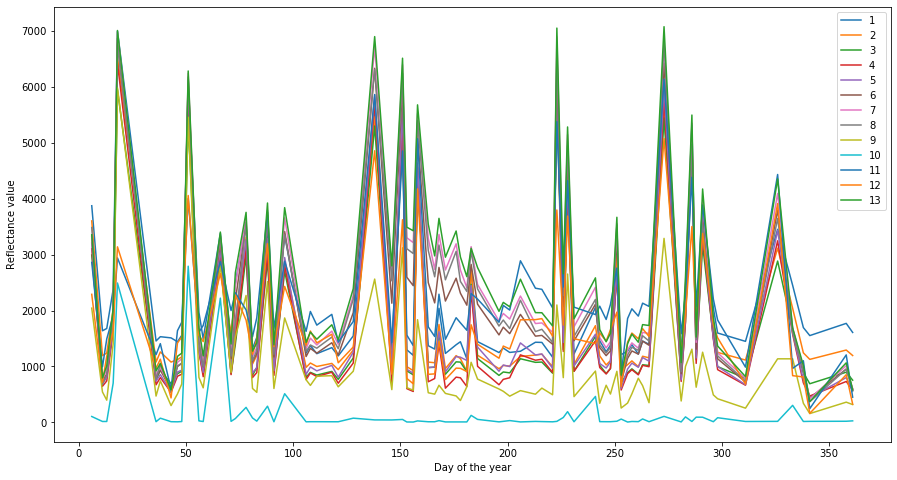

In [14]:
plt.rcParams['figure.figsize'] = [15, 8] # dimension of figure

# reflectance bands are not equally-spaced but we do so here for simplicity
# for more information see: https://gisgeography.com/sentinel-2-bands-combinations/
plt.plot(days_of_year, np_er_stack)
plt.legend(range(1,np_er_stack.shape[1]+1))
plt.style.use('_classic_test_patch')
plt.xlabel('Day of the year')
plt.ylabel('Reflectance value')

### Do the same for another plot type
How does this compare to another plot?

Let's repeat the above processes in one step.

Crop fruit_of_temperate_climate_zones (of class 33301010) grows on rec_no 968745


Text(0, 0.5, 'Reflectance value')

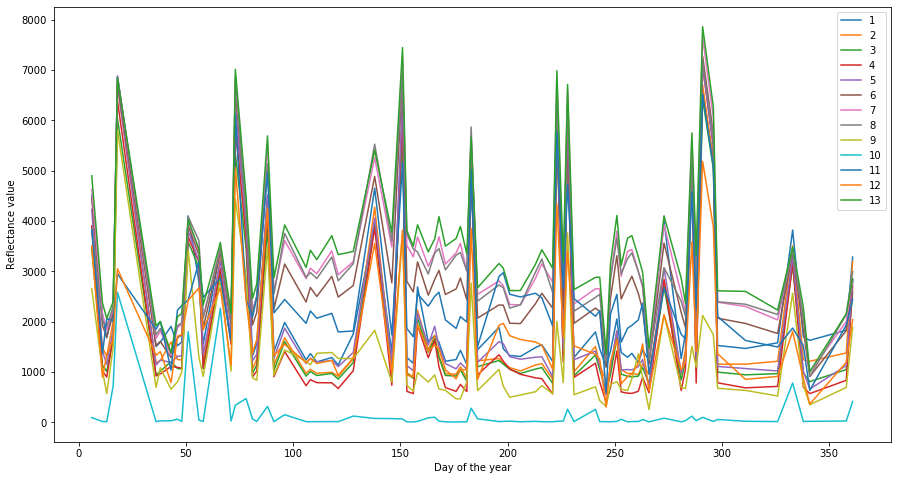

In [15]:
# Pick the last row
example_row2 = df_data1.iloc[-1]
recno2 = example_row2.name

# Get the corresponding label (from the CSV file)
crop_code2 = df_labels.loc[recno2]['crpgrpc']
crop_type2 = df_labels.loc[recno2]['crpgrpn']

print('Crop {} (of class {}) grows on rec_no {}'.format(crop_type2, crop_code2, recno2))

# convert from list to 2d-matrix
np_er2 = example_row2.to_numpy()
np_er_stack2 = np.stack(example_row2, axis=0)

# do the graphing
plt.rcParams['figure.figsize'] = [15, 8]
plt.plot(days_of_year, np_er_stack2)
plt.legend(range(1,np_er_stack.shape[1]+1))
plt.style.use('_classic_test_patch')
plt.xlabel('Day of the year')
plt.ylabel('Reflectance value')